In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


In [2]:
data_directory = 'data'

def loadData(data_directory, filename):
    data_pd = pd.read_csv(os.path.join(data_directory,filename))
    return data_pd

In [3]:
job_sat = loadData(data_directory, 'job_satisfaction.csv')

In [4]:
job_sat.head(10)

,PERSONID,YEAR,WEIGHT,SAMPLE,SURID,GENDER,MINRTY,RACETH,JOBSATIS
0,50000030000000003,2008,448.3050,801,1,1,0,2,2
1,50000030000000004,2008,413.7349,801,1,2,0,2,98
2,50000030000000005,2008,596.8539,801,1,1,0,2,98
3,50000030000000006,2008,152.0485,801,1,2,0,2,1
4,50000030000000104,2008,1071.0782,801,1,1,0,2,98
5,50000030000000105,2008,387.1170,801,1,2,0,2,3
6,50000030000000108,2008,254.0106,801,1,1,0,2,3
7,50000030000000109,2008,116.6477,801,1,2,0,2,98
8,50000030000000207,2008,141.4258,801,1,2,0,2,1
9,50000030000000303,2008,117.0577,801,1,1,0,2,1


In [5]:
job_sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323802 entries, 0 to 323801
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PERSONID  323802 non-null  int64  
 1   YEAR      323802 non-null  int64  
 2   WEIGHT    323802 non-null  float64
 3   SAMPLE    323802 non-null  int64  
 4   SURID     323802 non-null  int64  
 5   GENDER    323802 non-null  int64  
 6   MINRTY    323802 non-null  int64  
 7   RACETH    323802 non-null  int64  
 8   JOBSATIS  323802 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 22.2 MB


In [6]:
job_sat['JOBSATIS'].value_counts()

1     130480
2     116543
98     50078
3      20769
4       5932
Name: JOBSATIS, dtype: int64

## First filter

Since job satisfaction is our target variable, the entires with it equal to 98 ('logical skip') are of not use for us. Thus, the first step is to filter those rows out.

In [7]:
job_sat = job_sat[job_sat['JOBSATIS'] != 98]
job_sat['JOBSATIS'].value_counts()

1    130480
2    116543
3     20769
4      5932
Name: JOBSATIS, dtype: int64

In [8]:
job_sat['RACETH'].value_counts()

2    171102
3     56993
1     45629
Name: RACETH, dtype: int64

In [9]:
job_sat['GENDER'].value_counts()

2    161197
1    112527
Name: GENDER, dtype: int64

In [10]:
job_sat['MINRTY'].value_counts()

0    216731
1     56993
Name: MINRTY, dtype: int64

array([[<AxesSubplot:title={'center':'PERSONID'}>,
        <AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'WEIGHT'}>],
       [<AxesSubplot:title={'center':'SAMPLE'}>,
        <AxesSubplot:title={'center':'SURID'}>,
        <AxesSubplot:title={'center':'GENDER'}>],
       [<AxesSubplot:title={'center':'MINRTY'}>,
        <AxesSubplot:title={'center':'RACETH'}>,
        <AxesSubplot:title={'center':'JOBSATIS'}>]], dtype=object)

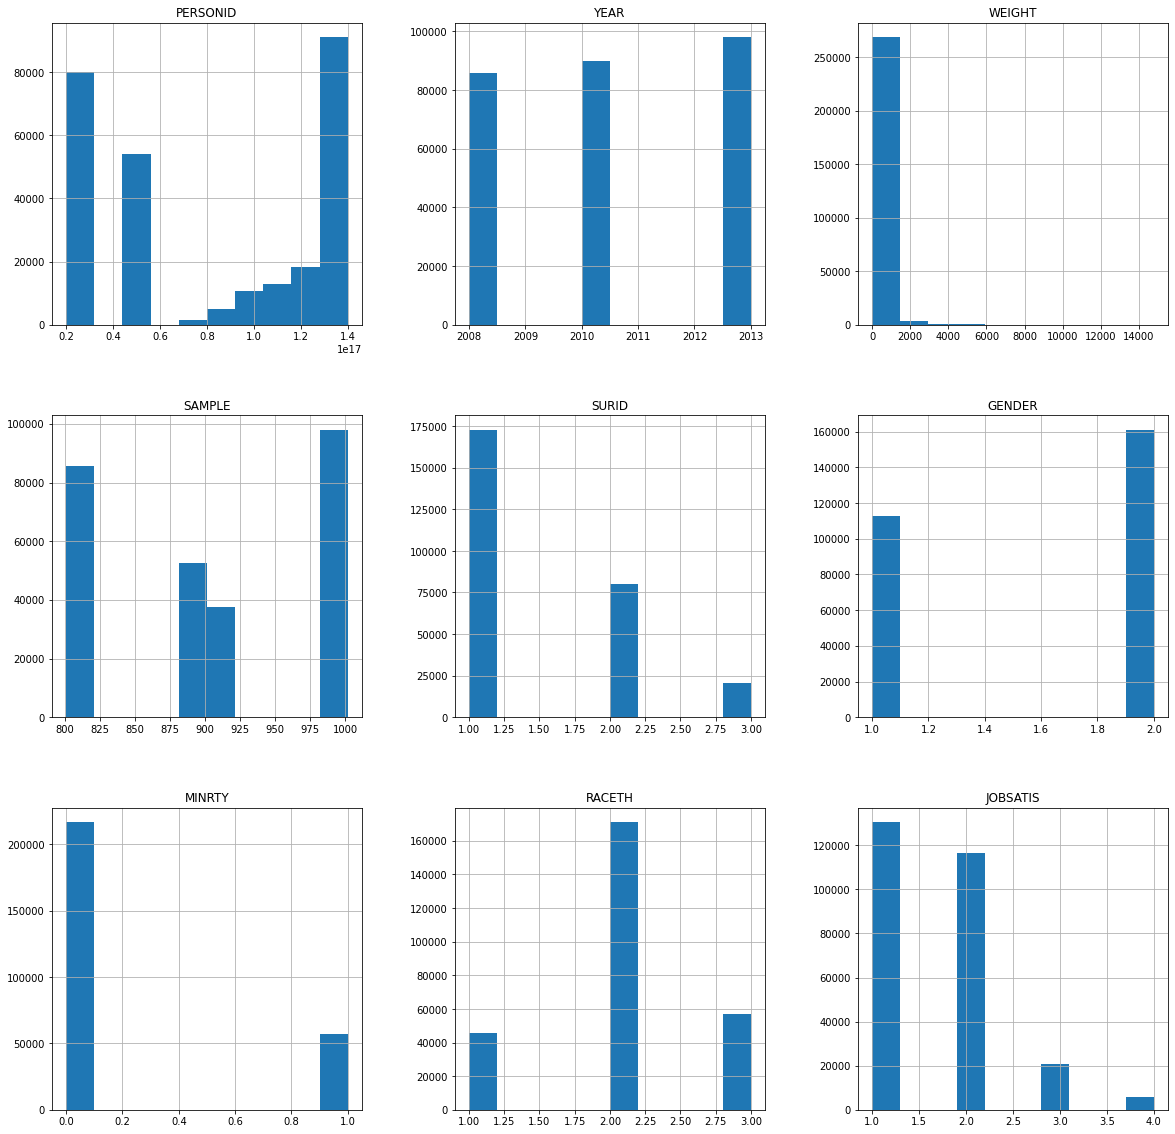

In [11]:
job_sat.hist(figsize=(20,20))

## Lets define a few things
Make a new variable being RJOBSATIS, which refers to a "rough job satisfaction". If someone has a JOBSATIS equal to 1 or 2, then RJOBSATIS is equal to 1, meaning that the person has an overall positive job satisfaction. On the other hand, if someone has a JOBSATIS equal to 3 or 4, then RJOBSATIS is equal to 0, meaning that the individual has an overall negative experience at their job.

In [12]:
halo = 4

int(halo - 2 <= 0)

0

In [13]:
job_sat['RJOBSATIS'] = ((job_sat['JOBSATIS'] - 2) <= 0).astype('int64')

In [14]:
job_sat.head(10)

,PERSONID,YEAR,WEIGHT,SAMPLE,SURID,GENDER,MINRTY,RACETH,JOBSATIS,RJOBSATIS
0,50000030000000003,2008,448.3050,801,1,1,0,2,2,1
3,50000030000000006,2008,152.0485,801,1,2,0,2,1,1
5,50000030000000105,2008,387.1170,801,1,2,0,2,3,0
6,50000030000000108,2008,254.0106,801,1,1,0,2,3,0
8,50000030000000207,2008,141.4258,801,1,2,0,2,1,1
9,50000030000000303,2008,117.0577,801,1,1,0,2,1,1
10,50000030000000305,2008,696.8398,801,1,1,0,2,2,1
11,50000030000000308,2008,581.3200,801,1,2,0,2,1,1
12,50000030000000402,2008,267.8616,801,1,1,0,2,4,0
13,50000030000000406,2008,137.4780,801,1,1,0,2,1,1


In [15]:
job_sat['RJOBSATIS'].shape

(273724,)

In [16]:
total_sample_size = job_sat['RJOBSATIS'].shape[0]
total_satisfied = np.sum(job_sat['RJOBSATIS'].values)

In [17]:
def printProbabilities(total_satisfied, sample_size, title):
    satisfied_probability = total_satisfied/sample_size
    unsatisfied_probability = 1 - satisfied_probability
    print()
    print(f"SHORT REPORT: {title}")
    print(f"The sample size is equal to: {sample_size}")
    print(f"The number of satisfied people is equal to: {total_satisfied}")
    print()
    print(f"PROBABILITIES ========================================")
    print(f"The probability of 'satisfied' is equal to: {satisfied_probability}")
    print(f"The probability of 'unsatisfied' is equal to: {unsatisfied_probability}")
    print()

In [18]:
printProbabilities(total_satisfied, total_sample_size, 'ENTIRE SAMPLE')


SHORT REPORT: ENTIRE SAMPLE
The sample size is equal to: 273724
The number of satisfied people is equal to: 247023

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.902452835703117
The probability of 'unsatisfied' is equal to: 0.09754716429688304



## Now, we can start exploring!

The result above gives us a baseline to explore the level of inequality (if there is any) observed in job satisfaction. There is a few things that we can explore, and the fisrt one is to see if there are any inequalities when taking into account the gender.

## Difference between genders

In [19]:
job_sat_male = job_sat[job_sat['GENDER'] == 2]
job_sat_male.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161197 entries, 3 to 323796
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PERSONID   161197 non-null  int64  
 1   YEAR       161197 non-null  int64  
 2   WEIGHT     161197 non-null  float64
 3   SAMPLE     161197 non-null  int64  
 4   SURID      161197 non-null  int64  
 5   GENDER     161197 non-null  int64  
 6   MINRTY     161197 non-null  int64  
 7   RACETH     161197 non-null  int64  
 8   JOBSATIS   161197 non-null  int64  
 9   RJOBSATIS  161197 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 13.5 MB


In [20]:
job_sat_female = job_sat[job_sat['GENDER'] == 1]
job_sat_female.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112527 entries, 0 to 323801
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PERSONID   112527 non-null  int64  
 1   YEAR       112527 non-null  int64  
 2   WEIGHT     112527 non-null  float64
 3   SAMPLE     112527 non-null  int64  
 4   SURID      112527 non-null  int64  
 5   GENDER     112527 non-null  int64  
 6   MINRTY     112527 non-null  int64  
 7   RACETH     112527 non-null  int64  
 8   JOBSATIS   112527 non-null  int64  
 9   RJOBSATIS  112527 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 9.4 MB


## Calculate probabilities
Do the same thing as before, but now for the different datasets.

In [21]:
male_sample_size = job_sat_male['RJOBSATIS'].shape[0]
male_satisfied = np.sum(job_sat_male['RJOBSATIS'].values)
printProbabilities(male_satisfied, male_sample_size, 'MALE')


SHORT REPORT: MALE
The sample size is equal to: 161197
The number of satisfied people is equal to: 146419

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.9083233558937202
The probability of 'unsatisfied' is equal to: 0.09167664410627985



In [22]:
female_sample_size = job_sat_female['RJOBSATIS'].shape[0]
female_satisfied = np.sum(job_sat_female['RJOBSATIS'].values)
printProbabilities(female_satisfied, female_sample_size, 'FEMALE')


SHORT REPORT: FEMALE
The sample size is equal to: 112527
The number of satisfied people is equal to: 100604

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.8940432074079998
The probability of 'unsatisfied' is equal to: 0.10595679259200019



## Difference between minority
Now let us explore if there is any difference between people who identify themselves as part of a minority and those who doesn't.

In [23]:
job_sat_minority = job_sat[job_sat['MINRTY'] == 1]
job_sat_minority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56993 entries, 31 to 323800
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   56993 non-null  int64  
 1   YEAR       56993 non-null  int64  
 2   WEIGHT     56993 non-null  float64
 3   SAMPLE     56993 non-null  int64  
 4   SURID      56993 non-null  int64  
 5   GENDER     56993 non-null  int64  
 6   MINRTY     56993 non-null  int64  
 7   RACETH     56993 non-null  int64  
 8   JOBSATIS   56993 non-null  int64  
 9   RJOBSATIS  56993 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.8 MB


In [24]:
job_sat_notminority = job_sat[job_sat['MINRTY'] == 0]
job_sat_notminority.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216731 entries, 0 to 323801
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PERSONID   216731 non-null  int64  
 1   YEAR       216731 non-null  int64  
 2   WEIGHT     216731 non-null  float64
 3   SAMPLE     216731 non-null  int64  
 4   SURID      216731 non-null  int64  
 5   GENDER     216731 non-null  int64  
 6   MINRTY     216731 non-null  int64  
 7   RACETH     216731 non-null  int64  
 8   JOBSATIS   216731 non-null  int64  
 9   RJOBSATIS  216731 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 18.2 MB


In [26]:
notminority_sample_size = job_sat_notminority['RJOBSATIS'].shape[0]
notminority_satisfied = np.sum(job_sat_notminority['RJOBSATIS'].values)
printProbabilities(notminority_satisfied, notminority_sample_size, 'NOT MINORITY')


SHORT REPORT: NOT MINORITY
The sample size is equal to: 216731
The number of satisfied people is equal to: 196717

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.9076551116360835
The probability of 'unsatisfied' is equal to: 0.09234488836391652



In [27]:
minority_sample_size = job_sat_minority['RJOBSATIS'].shape[0]
minority_satisfied = np.sum(job_sat_minority['RJOBSATIS'].values)
printProbabilities(minority_satisfied, minority_sample_size, 'MINORITY')


SHORT REPORT: MINORITY
The sample size is equal to: 56993
The number of satisfied people is equal to: 50306

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.8826698015545769
The probability of 'unsatisfied' is equal to: 0.11733019844542314



## Race, try Asian vs White vs Minorities using RACETH
Same thing, create three new datasets

In [29]:
job_sat_white = job_sat[job_sat['RACETH'] == 2]
job_sat_white.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 171102 entries, 0 to 323801
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   PERSONID   171102 non-null  int64  
 1   YEAR       171102 non-null  int64  
 2   WEIGHT     171102 non-null  float64
 3   SAMPLE     171102 non-null  int64  
 4   SURID      171102 non-null  int64  
 5   GENDER     171102 non-null  int64  
 6   MINRTY     171102 non-null  int64  
 7   RACETH     171102 non-null  int64  
 8   JOBSATIS   171102 non-null  int64  
 9   RJOBSATIS  171102 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 14.4 MB


In [30]:
job_sat_asian = job_sat[job_sat['RACETH'] == 1]
job_sat_asian.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45629 entries, 61 to 323798
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   45629 non-null  int64  
 1   YEAR       45629 non-null  int64  
 2   WEIGHT     45629 non-null  float64
 3   SAMPLE     45629 non-null  int64  
 4   SURID      45629 non-null  int64  
 5   GENDER     45629 non-null  int64  
 6   MINRTY     45629 non-null  int64  
 7   RACETH     45629 non-null  int64  
 8   JOBSATIS   45629 non-null  int64  
 9   RJOBSATIS  45629 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 3.8 MB


In [31]:
job_sat_minorityRACETH = job_sat[job_sat['RACETH'] == 3]
job_sat_minorityRACETH.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56993 entries, 31 to 323800
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PERSONID   56993 non-null  int64  
 1   YEAR       56993 non-null  int64  
 2   WEIGHT     56993 non-null  float64
 3   SAMPLE     56993 non-null  int64  
 4   SURID      56993 non-null  int64  
 5   GENDER     56993 non-null  int64  
 6   MINRTY     56993 non-null  int64  
 7   RACETH     56993 non-null  int64  
 8   JOBSATIS   56993 non-null  int64  
 9   RJOBSATIS  56993 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.8 MB


In [32]:
white_sample_size = job_sat_white['RJOBSATIS'].shape[0]
white_satisfied = np.sum(job_sat_white['RJOBSATIS'].values)
printProbabilities(white_satisfied, white_sample_size, 'WHITE')


SHORT REPORT: WHITE
The sample size is equal to: 171102
The number of satisfied people is equal to: 155760

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.9103341866255216
The probability of 'unsatisfied' is equal to: 0.08966581337447843



In [36]:
asian_sample_size = job_sat_asian['RJOBSATIS'].shape[0]
asian_satisfied = np.sum(job_sat_asian['RJOBSATIS'].values)
printProbabilities(asian_satisfied, asian_sample_size, 'ASIAN')


SHORT REPORT: ASIAN
The sample size is equal to: 45629
The number of satisfied people is equal to: 40957

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.897608976747244
The probability of 'unsatisfied' is equal to: 0.10239102325275595



In [35]:
minorityRACETH_sample_size = job_sat_minorityRACETH['RJOBSATIS'].shape[0]
minorityRACETH_satisfied = np.sum(job_sat_minorityRACETH['RJOBSATIS'].values)
printProbabilities(minorityRACETH_satisfied, minorityRACETH_sample_size, 'MINORITY RACETH')


SHORT REPORT: MINORITY RACETH
The sample size is equal to: 56993
The number of satisfied people is equal to: 50306

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.8826698015545769
The probability of 'unsatisfied' is equal to: 0.11733019844542314



## Summary of Results:

Here is a summary of the results

In [37]:
print(f'Information regarding the entire sample')
printProbabilities(total_satisfied, total_sample_size, 'ENTIRE SAMPLE')

print(f'Comparison between genders')
printProbabilities(male_satisfied, male_sample_size, 'MALE')
printProbabilities(female_satisfied, female_sample_size, 'FEMALE')


print(f'Comparison between self identification of minority')
printProbabilities(notminority_satisfied, notminority_sample_size, 'NOT MINORITY')
printProbabilities(minority_satisfied, minority_sample_size, 'MINORITY')

print(f'Comparison between different races/ethnicities')
printProbabilities(white_satisfied, white_sample_size, 'WHITE')
printProbabilities(asian_satisfied, asian_sample_size, 'ASIAN')
printProbabilities(minorityRACETH_satisfied, minorityRACETH_sample_size, 'MINORITY RACETH')

Information regarding the entire sample

SHORT REPORT: ENTIRE SAMPLE
The sample size is equal to: 273724
The number of satisfied people is equal to: 247023

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.902452835703117
The probability of 'unsatisfied' is equal to: 0.09754716429688304

Comparison between genders

SHORT REPORT: MALE
The sample size is equal to: 161197
The number of satisfied people is equal to: 146419

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.9083233558937202
The probability of 'unsatisfied' is equal to: 0.09167664410627985


SHORT REPORT: FEMALE
The sample size is equal to: 112527
The number of satisfied people is equal to: 100604

PROBABILITIES ========================================
The probability of 'satisfied' is equal to: 0.8940432074079998
The probability of 'unsatisfied' is equal to: 0.10595679259200019

Comparison between self identification of mi

## Possible conclusions
As we can see, we can detect a subtle difference in job satisfaction. Overall, females and non-white people have a slightly less satisfaction at their jobs.